In [10]:
!srun -c 4 --gres=gpu:rtx6000:1 --mem=10GB --pty --time=6:00:00 bash

srun: job 14780986 queued and waiting for resources
srun: job 14780986 has been allocated resources
g$ se) seyedmat@gpu141:/fs01/home/seyedmat/codes/HuggingFace/diffusers/inpainting^C

g$ se) seyedmat@gpu141:/fs01/home/seyedmat/codes/HuggingFace/diffusers/inpainting

In [17]:
import torch
torch.cuda.is_available()

False

In [14]:
import subprocess

# Define the srun command as a list of arguments
srun_command = [
    "srun", "-c", "4", "--gres=gpu:rtx6000:1", "--mem=10GB", "--time=6:00:00", "bash"
]

# Run the srun command
subprocess.run(srun_command)

import torch
# print('here')
torch.cuda.is_available()
# !set CUDA_VISIBLE_DEVICES="3"

srun: job 14781047 queued and waiting for resources
srun: job 14781047 has been allocated resources


KeyboardInterrupt: 

In [12]:
import subprocess

# Create a job script
job_script = """#!/bin/bash
#SBATCH --cpus-per-task=4
#SBATCH --gres=gpu:rtx6000:1
#SBATCH --mem=10GB
#SBATCH --time=6:00:00

python -c 'import torch; print(torch.cuda.is_available())'
"""

# Save the job script to a file
with open("job_script.sh", "w") as f:
    f.write(job_script)

# Submit the job
subprocess.run(["sbatch", "job_script.sh"])


Submitted batch job 14781042


CompletedProcess(args=['sbatch', 'job_script.sh'], returncode=0)

In [18]:
import subprocess

salloc_command = [
    "salloc", "-c", "4", "--gres=gpu:rtx6000:1", "--mem=10GB", "--time=6:00:00"
]

# Start the allocation
subprocess.run(salloc_command)

import torch
torch.cuda.is_available()

salloc: Pending job allocation 14781106
salloc: job 14781106 queued and waiting for resources


KeyboardInterrupt: 

In [16]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained("kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16)
pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()

/h/seyedmat/miniconda3/envs/hf-diffusers/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/fs01/home/seyedmat/miniconda3/envs/hf-diffusers/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/h/seyedmat/miniconda3/envs/hf-diffusers/lib/python3.9/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https:

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [17]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

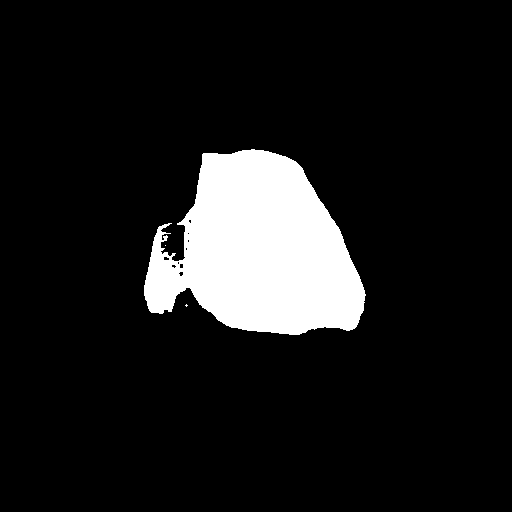

In [18]:
mask_image

100%|██████████| 100/100 [00:26<00:00,  3.77it/s]


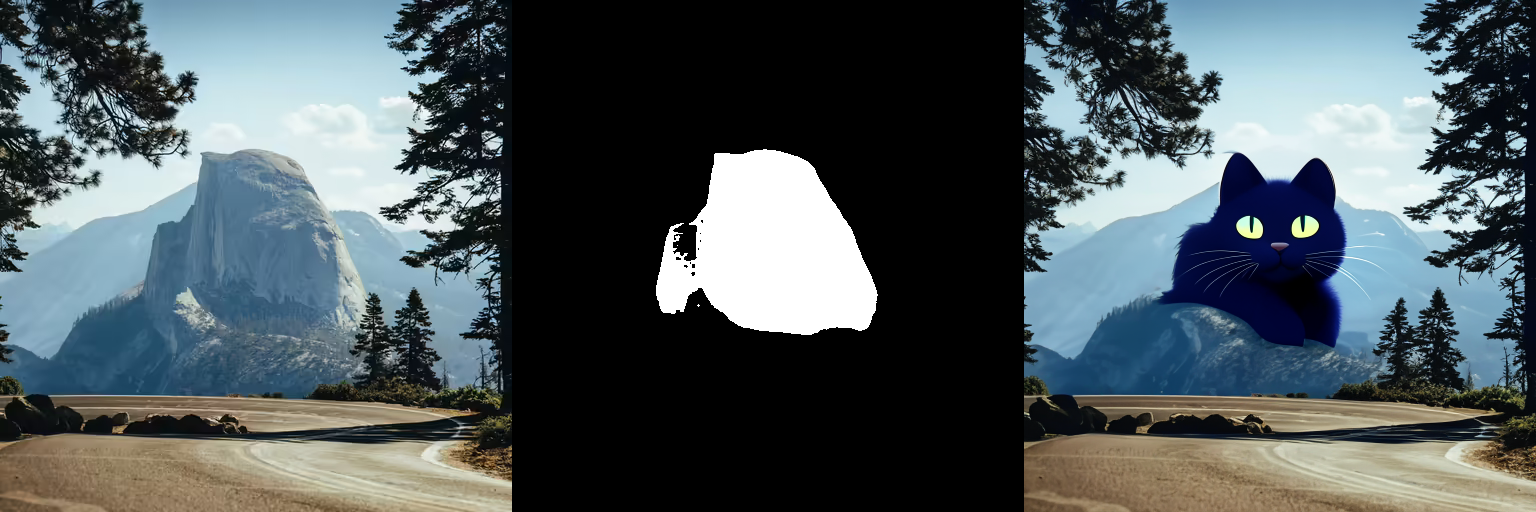

In [20]:
prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


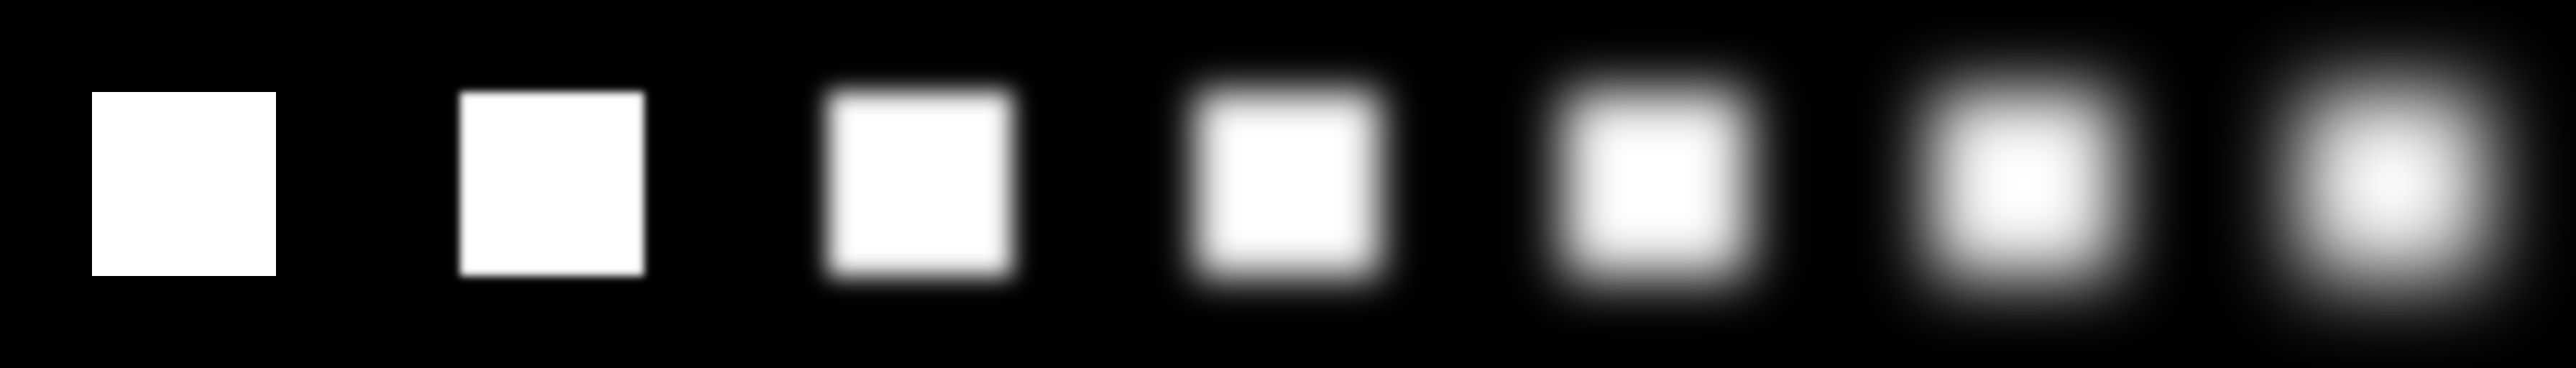

In [29]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
from PIL import Image, ImageDraw, ImageFont

pipeline = AutoPipelineForInpainting.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16)

mask = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/seashore_mask.png")
blurred_masks = []
blur_factors = range(5, 56, 10)
for blur_factor in blur_factors:
    blurred_mask = pipeline.mask_processor.blur(mask, blur_factor=blur_factor)
    blurred_masks.append(blurred_mask)
# make_image_grid([mask, blurred_mask], rows=1, cols=2)
make_image_grid([mask] + blurred_masks, rows=1, cols=1 + len(blurred_masks))

In [ ]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16)
pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()

init_image = load_daatset("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_daatset("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

generator = torch.Generator("cuda").manual_seed(92)
prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)